In [97]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("datasets/ml_ready_set_unbalanced.csv")

In [52]:
df.head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,case_status_encoded,full_time_encoded
0,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0,0,1
1,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0,0,1
2,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0,0,1
3,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0,0,1
4,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0,0,1


In [53]:
df_names = df.drop("case_status_encoded",axis=1)
names = list(df_names)

In [57]:
scaler = StandardScaler()
def scale_data(X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

In [58]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [59]:
def classifier(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = metrics.accuracy_score(predictions,y_test)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, target_names=["0", "1"], title="Confusion Matrix", cmap=None, normalize=False)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print("percentage of correct denial:" + str((TN / (FN + TN)) * 100))
    print("precision: " + str(precision))
    print("recall: " + str(recall))
    print("f1 score: " + str(f1_score))
    #eturn model

In [76]:
def return_importance(model, names):
    importance = model.feature_importances_
    print("\nFeature importance:")
    for name, importance in zip(names, importance):
        print(name + ": " + str(importance))

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 98.749%


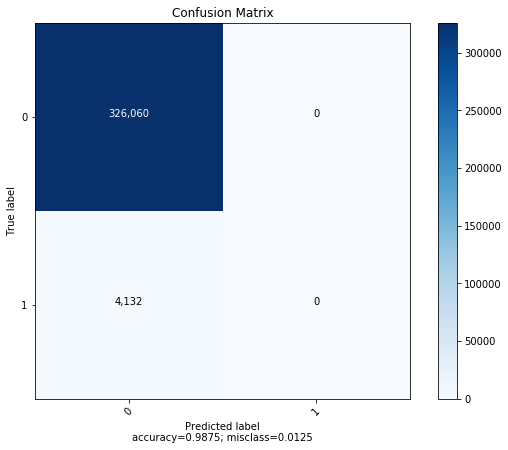

percentage of correct denial:0.0
precision: 1.0
recall: 0.9874860687115375
f1 score: 0.9937036382365312


In [86]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)
model = LogisticRegression()
classifier(model, X_train["wage_diff"].values.reshape(-1, 1), X_test["wage_diff"].values.reshape(-1, 1),
           y_train, y_test)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 99.196%


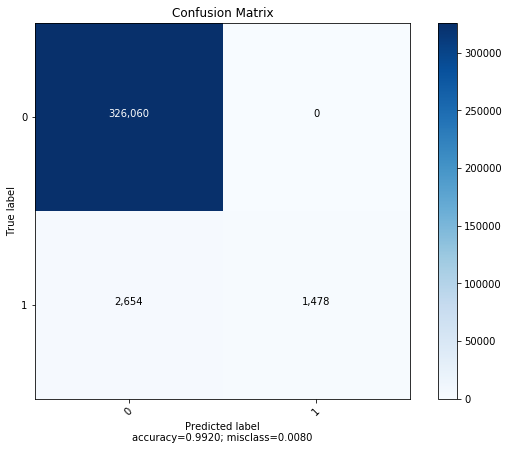

percentage of correct denial:35.76960309777348
precision: 1.0
recall: 0.9919261120609405
f1 score: 0.995946693057452


In [87]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)
model = LogisticRegression()
classifier(model, X_train["decision_duration"].values.reshape(-1, 1),
           X_test["decision_duration"].values.reshape(-1, 1),y_train, y_test)

2 models to use for baseline both are 1 feature logistic regression models

In [61]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 99.039%


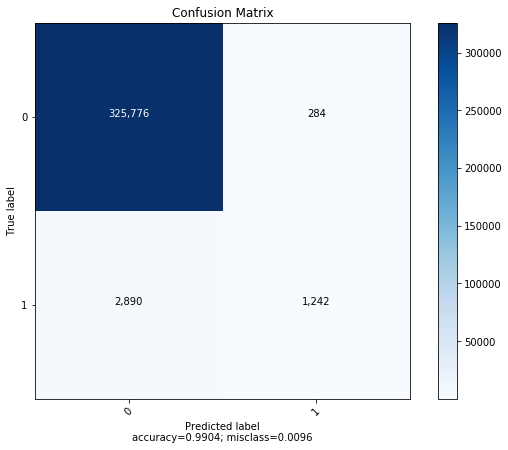

percentage of correct denial:30.05808325266215
precision: 0.9991289946635589
recall: 0.9912068787157783
f1 score: 0.9951521705262965


In [80]:
model = LogisticRegression()
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 99.483%


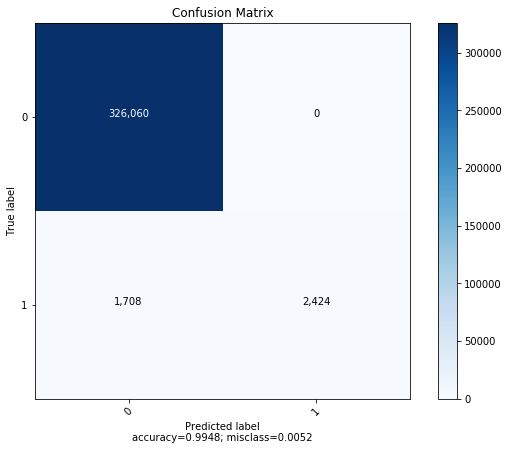

percentage of correct denial:58.66408518877058
precision: 1.0
recall: 0.9947889970955066
f1 score: 0.9973876921759239

Feature importance:
PREVAILING_WAGE: 0.005041665868742198
WAGE_RATE_OF_PAY_FROM: 0.005796890978615468
wage_diff: 0.29564910637142555
applications_per_employer: 0.010371523461171097
employer_success_rate: 0.22852810036686358
decision_duration: 0.45314067602081964
employment_duration: 0.0010773456685162959
regions_midwest: 9.70697888827792e-07
regions_northeast: 1.4675123494730834e-05
regions_other: 2.829869420555904e-05
regions_south: 1.4158345291648483e-05
regions_west: 7.906440584286907e-06
full_time_encoded: 0.00032868196238135076


In [81]:
model = RandomForestClassifier(n_estimators = 100 ,max_depth = 3)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)
return_importance(model, names)

Accuracy : 99.528%


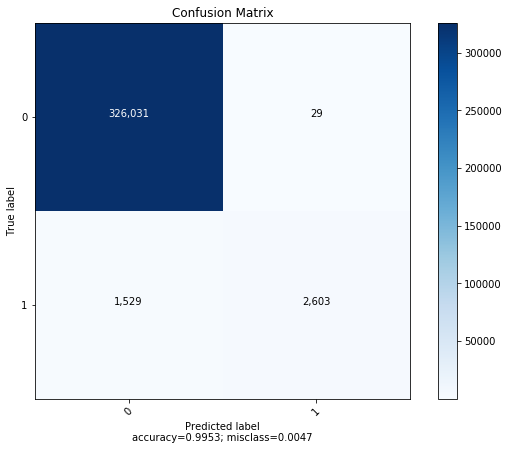

percentage of correct denial:62.996127783155856
precision: 0.9999110593142366
recall: 0.9953321528880205
f1 score: 0.9976163520088125

Feature importance:
PREVAILING_WAGE: 0.004128078131158141
WAGE_RATE_OF_PAY_FROM: 0.0035797746460373312
wage_diff: 0.23044506436537537
applications_per_employer: 0.008674420599814095
employer_success_rate: 0.2396661738282522
decision_duration: 0.5116874892657595
employment_duration: 0.0013185937912203528
regions_midwest: 2.157488133453489e-05
regions_northeast: 3.4458694961309875e-05
regions_other: 7.996986223205882e-05
regions_south: 4.5323920432144795e-05
regions_west: 3.1235463628392895e-05
full_time_encoded: 0.0002878425497949078


In [82]:
model = RandomForestClassifier(n_estimators = 150 ,max_depth = 5)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)
return_importance(model, names)

Accuracy : 99.534%


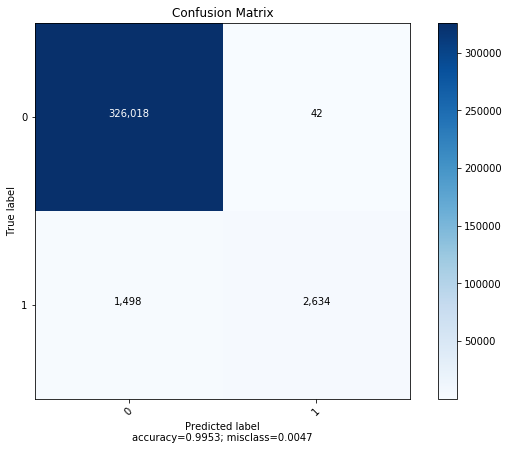

percentage of correct denial:63.74636979670861
precision: 0.9998711893516531
recall: 0.9954261776523895
f1 score: 0.9976437323279925

Feature importance:
PREVAILING_WAGE: 0.003583674144995004
WAGE_RATE_OF_PAY_FROM: 0.0017512594009143863
wage_diff: 0.17570759374984002
applications_per_employer: 0.009073341741095468
employer_success_rate: 0.15696370744325613
decision_duration: 0.6501927209333549
employment_duration: 0.0019049621230969281
regions_midwest: 3.657486203764944e-05
regions_northeast: 8.762918429570696e-05
regions_other: 9.087635546954824e-06
regions_south: 2.6552767371477382e-05
regions_west: 0.00011656320664453201
full_time_encoded: 0.0005463328075510633


In [77]:
model = RandomForestClassifier(n_estimators = 15 ,max_depth = 5)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)
return_importance(model, names)

Accuracy : 99.525%


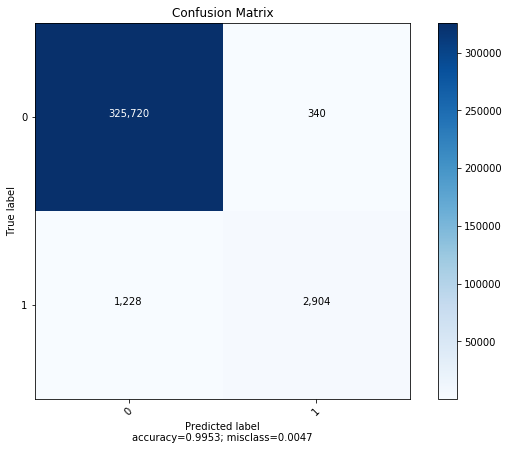

percentage of correct denial:70.28073572120039
precision: 0.9989572471324296
recall: 0.9962440510417558
f1 score: 0.9975988043025505

Feature importance:
PREVAILING_WAGE: 0.006319999321354979
WAGE_RATE_OF_PAY_FROM: 0.004528021430687288
wage_diff: 0.22157099068981992
applications_per_employer: 0.011398051226062276
employer_success_rate: 0.16651355269439777
decision_duration: 0.5861148912360823
employment_duration: 0.0024421290991770393
regions_midwest: 0.00014323017466172182
regions_northeast: 0.00012648826066362218
regions_other: 0.0002755428161083124
regions_south: 7.54263600513685e-05
regions_west: 7.86181477303713e-05
full_time_encoded: 0.000413058543203102


In [78]:
model = RandomForestClassifier(n_estimators = 20 ,max_depth = 8)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)
return_importance(model, names)

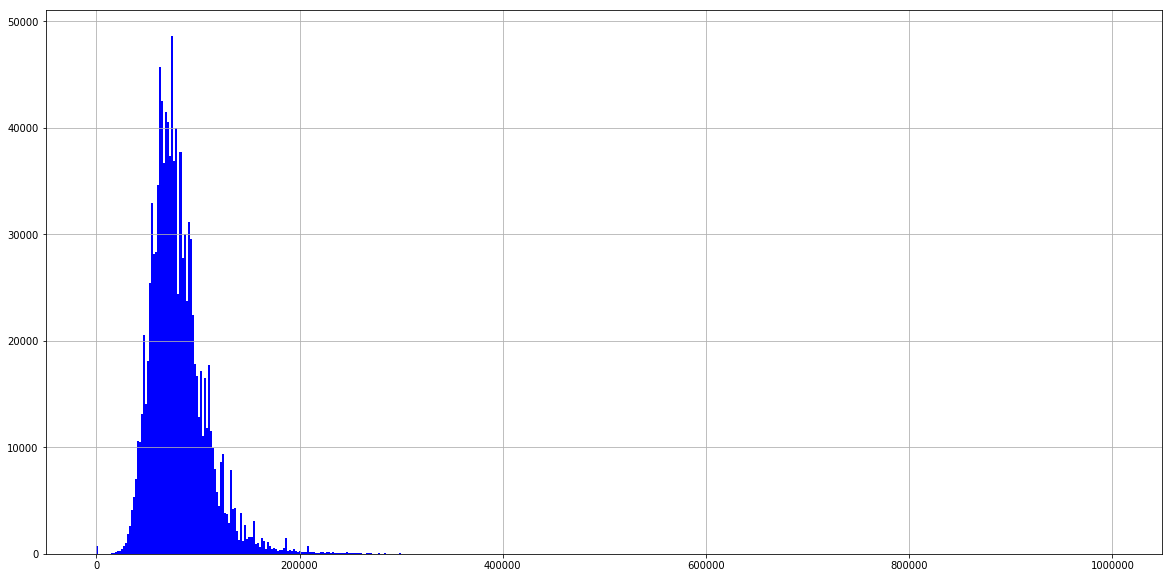

In [67]:
df["PREVAILING_WAGE"].hist(bins=500, figsize=(20,10) , color = 'b')

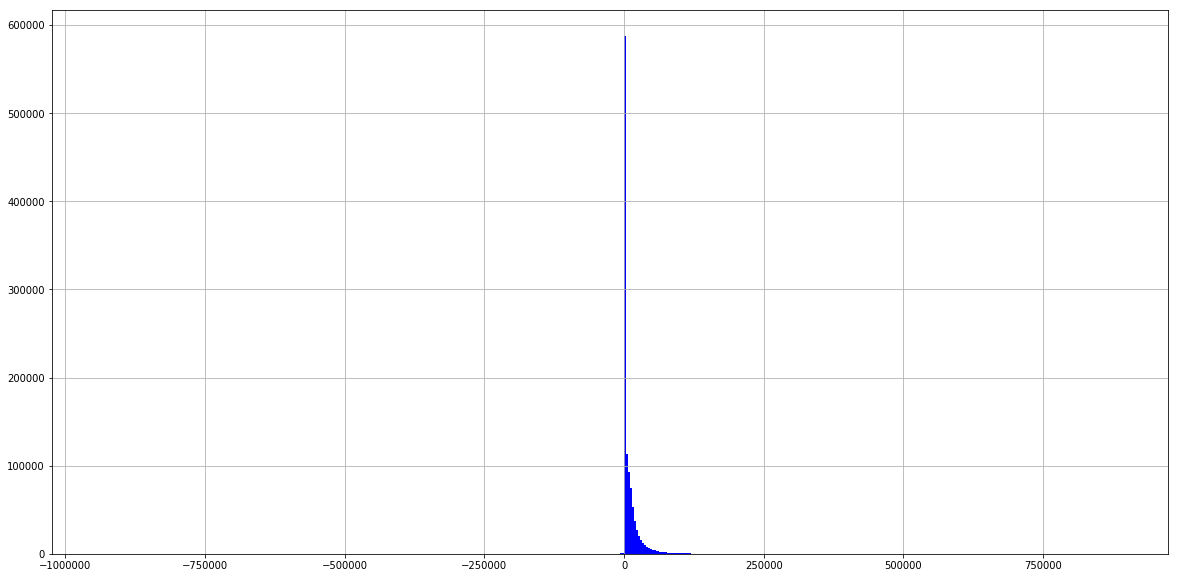

In [68]:
df["wage_diff"].hist(bins=500, figsize=(20,10) , color = 'b')

In [69]:
df["wage_diff"].mean()

9712.939684677345

In [70]:
print(df["PREVAILING_WAGE"].mean() + (df["PREVAILING_WAGE"].std() * 2))

137139.643432964


In [71]:
df = df[df["PREVAILING_WAGE"] < 300000]

In [72]:
#df = df[df["wage_diff"] >= 0]

In [73]:
#df["wage_diff"].hist(bins=500, figsize=(20,10) , color = 'b')

removed an rows with prevailing wage below 200 as these values dont make sense as it should be wage in years

In [74]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 99.039%


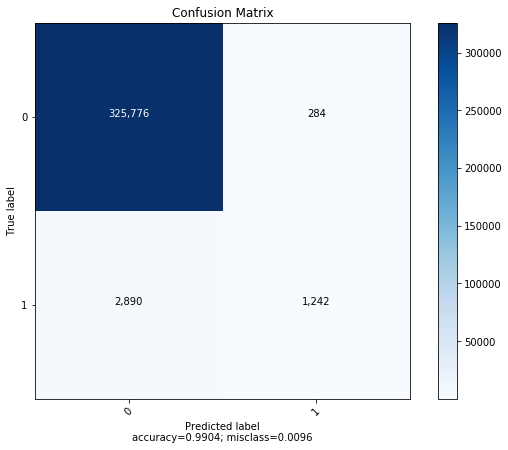

percentage of correct denial:30.05808325266215
precision: 0.9991289946635589
recall: 0.9912068787157783
f1 score: 0.9951521705262965


In [75]:
model = LogisticRegression()
model = classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)

Judging by feature importance full time encoded and employment duration make very little difference to the model but feature created during fature engineering are very important. these feature are decision duration regions and wage difference.

In [98]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X = df_model
y = target
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

Accuracy : 75.726%


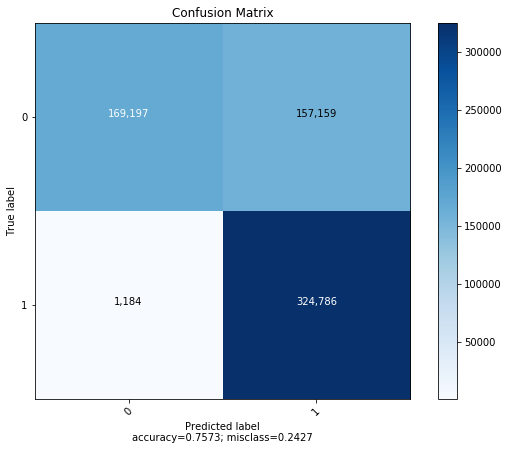

percentage of correct denial:99.63677639046537
precision: 0.5184430499209453
recall: 0.9930508683479965
f1 score: 0.6812337313306639

Feature importance:
PREVAILING_WAGE: 0.0011092473787329227
WAGE_RATE_OF_PAY_FROM: 0.002901454785845573
wage_diff: 0.07144526823863276
applications_per_employer: 0.037240536964233344
employer_success_rate: 0.3699370735484436
decision_duration: 0.4272063570217918
employment_duration: 0.018681187246490857
regions_midwest: 0.019910687957273698
regions_northeast: 0.018695875440811943
regions_other: 3.3063562945060186e-06
regions_south: 0.018072785773585044
regions_west: 0.013199810117089034
full_time_encoded: 0.0015964091707749996


In [100]:
model = RandomForestClassifier(n_estimators = 20 ,max_depth = 8)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)
return_importance(model, names)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 92.763%


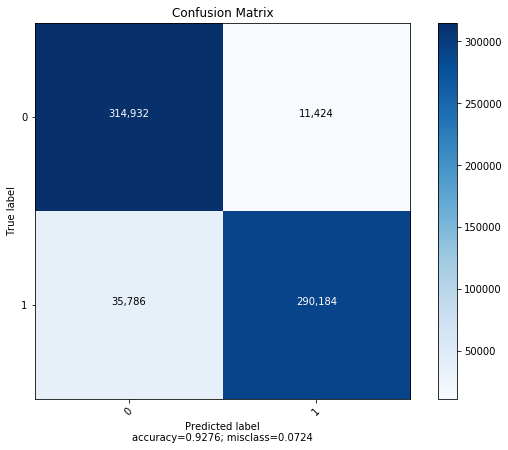

percentage of correct denial:89.02168911249501
precision: 0.9649952812266359
recall: 0.8979636060880821
f1 score: 0.9302735003854823


In [101]:
model = LogisticRegression()
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)